# Upper Confidence Bound (UCB)

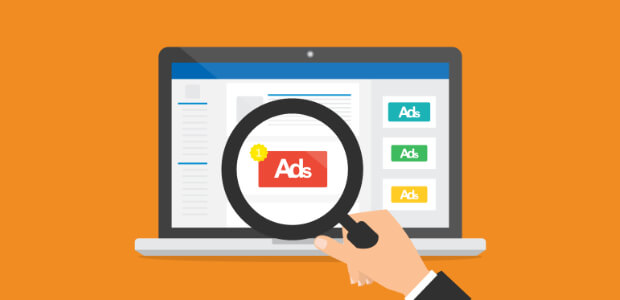

### Predicting ad positioning
#### Task Details
Placement of ads on a website is the primary problem for companies that operate on ad revenue. The position where the ad is placed plays a pivotal role in whether or not the ad will be clicked.

#### Expected Submission
Create a notebook, which proposes the the best position for ads placement.

#### Evaluation
You need to predict the ad position so that it is clicked by the website users.
The total clicked ad positions can be used for evaluation of the model.

## Libraries and Utilities

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import math

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/kaggle/input/ads-ctr-optimisation/Ads_CTR_Optimisation.csv')
df.head()

In [ ]:
df.shape

## Random Selection

In [ ]:
N = 10000
d = 10
total_prize = 0
selected = []
for n in range(0,N):
    ad = random.randrange(d)
    selected.append(ad)
    prize = df.values[n,ad] # if n th row is 1 then prize is 1
    total_prize = total_prize + prize
print("Total Prize:",total_prize)

In [ ]:
selected[0:20]

In [ ]:
plt.hist(selected)
plt.ylim(0,6500)
plt.title("Random Selection Histogram")
plt.show()

## Upper Confidence Bound (UCB)
Rather than performing exploration by simply selecting an arbitrary action, chosen with a probability that remains constant, the UCB algorithm changes its exploration-exploitation balance as it gathers more knowledge of the environment. It moves from being primarily focused on exploration, when actions that have been tried the least are preferred, to instead concentrate on exploitation, selecting the action with the highest estimated reward.

In [ ]:
N = 10000
d = 10
prizes = [0] * d
click = [0] * d
total_prize = 0
selected = [0]
for n in range(1,N):
    ad = 0
    max_ucb = 0
    for i in range(0,d):
        if(click[i] > 0):
            avg_prize = prizes[i] / click[i]
            delta = math.sqrt(3/2*math.log(n)/click[i])
            ucb = avg_prize + delta
        else:
            ucb = N*10
        if max_ucb < ucb:
            max_ucb = ucb
            ad = i
            
    selected.append(ad)   
    click[ad] = click[ad] + 1
    prize = df.values[n,ad]
    prizes[ad] = prizes[ad] + prize
    total_prize = total_prize + prize
    
print("Total Prize:" , total_prize)

In [ ]:
plt.hist(selected)
plt.title("UCB Histogram")
plt.show()